In [12]:
#%%
import numpy as np
import pandas as pd
import requests
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from typing import Tuple, List, Dict
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [13]:
#%%
data = fetch_california_housing(as_frame=True)


In [14]:
#%%
cali_housing_X = data.data
cali_housing_y = data.target

train_X, test_X, train_y, test_y = train_test_split(cali_housing_X,cali_housing_y,test_size=0.15,random_state=1234)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.15,random_state=1234)


In [15]:
#%%
mu = train_X.mean(axis=0)
std = train_X.std(axis=0)
train_X = (train_X - mu)/std
test_X = (test_X - mu)/std
valid_X = (valid_X - mu)/std


In [16]:
#%%
train_X = np.hstack((np.ones((train_X.shape[0],1)),train_X.values))
valid_X = np.hstack((np.ones((valid_X.shape[0],1)),valid_X.values))
test_X = np.hstack((np.ones((test_X.shape[0],1)),test_X.values))


In [17]:
#%%
theta = np.dot(np.dot(np.linalg.inv(np.dot(train_X.T,train_X)),train_X.T),train_y)


In [18]:
#%%
valid_y_hat = np.dot(valid_X, theta)
valid_mse = np.sum((valid_y_hat - valid_y)**2)/(valid_y.shape[0])
test_y_hat = np.dot(test_X, theta)
test_mse = np.sum((test_y_hat - test_y)**2)/(test_y.shape[0])


In [19]:
#%%
learning_rate = 0.00001
num_epochs = 500

np.random.seed(1234)
theta = np.random.randn(train_X.shape[1],1)

In [20]:
#%%
def calc_gradient(x: np.ndarray, theta: np.ndarray, y):
    return (2 * np.dot(x.T,(np.dot(x,theta) - y)))/x.shape[0]
def calc_mse(y_hat: np.ndarray, y: np.ndarray):
    return np.sum((y_hat - y)**2)/(y.shape[0])


In [21]:
#%%
train_loss: np.ndarray = []
valid_loss: np.ndarray = []
for epoch in range(0,num_epochs):
    for iter in range(train_X.shape[0]):
        # pick a random sample
        rand_index = np.random.randint(0,train_X.shape[0])
        x_i = train_X[rand_index:rand_index+1]
        y_i =  train_y[rand_index:rand_index+1].values
        gradients = calc_gradient(x_i,theta,y_i)
        theta = theta - gradients * learning_rate
        #print(f"iter {iter}: {theta}")
    train_y_hat = np.dot(train_X, theta).flatten()
    train_loss.append(calc_mse(train_y_hat,train_y))
    valid_y_hat = np.dot(valid_X, theta).flatten()
    valid_loss.append(calc_mse(valid_y_hat,valid_y))
    print(f"epoch {epoch}: {train_loss[-1]}, {valid_loss[-1]}")
    # we stop if the validation loss is not imporving significantly (abs tolerance 0.001) over an average of 5 values say
    # for last 20 epochs 
    if epoch > 20 and math.isclose(np.average(valid_loss[-10:-5]), np.average(valid_loss[-5:]), abs_tol=0.001):
        print(f"stopping at epoch {epoch}")
        break

epoch 0: 6.343335479505247, 5.791081335282139
epoch 1: 3.339716766825933, 3.0930484292775913
epoch 2: 1.998983472584843, 1.9267918308569065
epoch 3: 1.3925120345568565, 1.3483085399370343
epoch 4: 1.0490277744154226, 1.02353557470064
epoch 5: 0.8814111739517995, 0.8542158509592832
epoch 6: 0.7896091827237993, 0.7597832817421857
epoch 7: 0.7298323005286205, 0.6968005177831514
epoch 8: 0.6949389726925329, 0.659705790812554
epoch 9: 0.6730976015164284, 0.6367144640771087
epoch 10: 0.658143392812289, 0.6209479671896538
epoch 11: 0.6464134163990823, 0.6080146004259803
epoch 12: 0.637881827222869, 0.59831402920129
epoch 13: 0.6309974228765913, 0.5905331915051518
epoch 14: 0.62509374988312, 0.5848026764504892
epoch 15: 0.6195654535895047, 0.5788418822968469
epoch 16: 0.6150281425132952, 0.5738522383654588
epoch 17: 0.6105777056352545, 0.5687870564324877
epoch 18: 0.6065234347615843, 0.5643681450909181
epoch 19: 0.6027061913786858, 0.560375318953656
epoch 20: 0.5992057251467884, 0.556869041542

c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: >

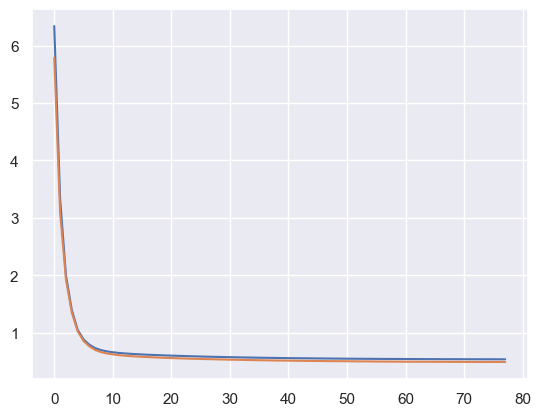

In [22]:
# %%
ax = sns.lineplot(x=range(0,len(train_loss)),y=train_loss)
sns.lineplot(x=range(0,len(train_loss)),y=valid_loss,ax=ax)


In [23]:
#%%
def calc_gradient_ridge(x: np.ndarray, theta: np.ndarray, y, alpha: np.float32 = 0.001):
    return 2 * (np.dot(x.T,(np.dot(x,theta).flatten() - y)) + np.dot(alpha,theta).flatten())/x.shape[0]


In [24]:
#%%
train_loss: np.ndarray = []
valid_loss: np.ndarray = []
batch_size = 25
num_epochs = 1000
alpha = 0.0001
theta = np.random.randn(train_X.shape[1],)
batch_count = train_X.shape[0] // batch_size + (0 if train_X.shape[0] % batch_size == 0 else 1)
for epoch in range(0,num_epochs):
    # random shuffle the training data and the test data
    random_idx = np.random.randint(0,train_X.shape[0],size = (train_X.shape[0],))
    shuffled_train_X = train_X[random_idx]
    shuffled_train_y = train_y.values[random_idx]
    for batch_idx in range(0,batch_count):
        batch_X = train_X[batch_idx*batch_size:(batch_idx + 1)*batch_size]
        batch_y = train_y[batch_idx*batch_size:(batch_idx + 1)*batch_size]
        gradients = calc_gradient_ridge(batch_X,theta,batch_y)
        theta = theta - gradients * learning_rate
        #print(f"iter {iter}: {theta}")
    train_y_hat = np.dot(shuffled_train_X, theta).flatten()
    train_loss.append(calc_mse(train_y_hat,shuffled_train_y))
    valid_y_hat = np.dot(valid_X, theta).flatten()
    valid_loss.append(calc_mse(valid_y_hat,valid_y))
    print(f"epoch {epoch}: {train_loss[-1]}, {valid_loss[-1]}")
    # we stop if the validation loss is not imporving significantly (abs tolerance 0.001) over an average of 5 values say
    # for last 20 epochs 
    if epoch > 20 and math.isclose(np.average(valid_loss[-10:-5]), np.average(valid_loss[-5:]), abs_tol=0.001):
        print(f"stopping at epoch {epoch}")
        break

epoch 0: 21.988781746659384, 21.502387679746782
epoch 1: 22.301623080843843, 20.99606600713529
epoch 2: 21.010062134081664, 20.502894269457794
epoch 3: 20.156396424245845, 20.022505046883765
epoch 4: 19.829562130283495, 19.55454226209193
epoch 5: 19.17158063766143, 19.098660786982528
epoch 6: 18.712351227988933, 18.654526064598173
epoch 7: 18.569715132071888, 18.22181374561484
epoch 8: 18.133324438360777, 17.80020933879152
epoch 9: 17.445182965674675, 17.38940787479505
epoch 10: 17.29370400426245, 16.98911358284173
epoch 11: 16.904750145581684, 16.599039579622644
epoch 12: 16.605022036995493, 16.218907570002628
epoch 13: 16.071681981406297, 15.848447559005749
epoch 14: 16.0281761755121, 15.48739757462081
epoch 15: 15.368782907801187, 15.135503400981886
epoch 16: 14.981563729162424, 14.792518321497477
epoch 17: 14.786893006979561, 14.458202871521209
epoch 18: 14.314939704934165, 14.132324600174062
epoch 19: 13.91032472877647, 13.81465784094592
epoch 20: 13.59770176263356, 13.50498349071

c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: >

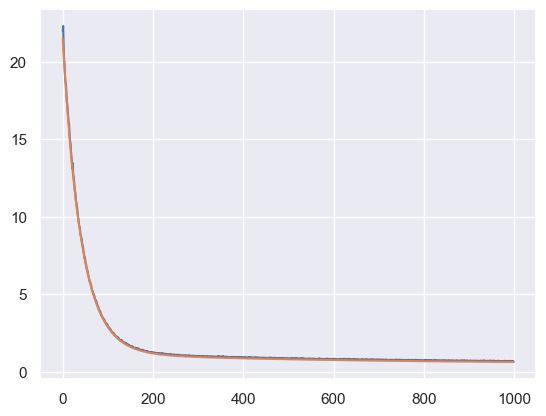

In [25]:
# %%
ax = sns.lineplot(x=range(0,len(train_loss)),y=train_loss)
sns.lineplot(x=range(0,len(train_loss)),y=valid_loss,ax=ax)

In [38]:
from itertools import filterfalse
a = [10,20,30,40,50,60]
b = list(filterfalse(lambda itm: itm[0] == 5, enumerate(a)))